In [1]:
import numpy as np
import os
import pandas as pd
# plotting specifications
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.cm import ScalarMappable
from cycler import cycler
mpl.rcParams.update({'font.size': 14})
plt.rcParams['axes.axisbelow'] = True
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
color_names = ['blue', 'red', 'green', 'black', 'magenta', 'y', 'slategray', 'darkorange']
mpl.rcParams['axes.prop_cycle'] = cycler(color=color_names)
pd.set_option('display.max_columns', None)
%matplotlib widget
from drl_grams import *

# N-gramas para control dinámico

## N = 13

In [2]:
n13_ga_acc_actions = uniformize_data('ga',**{'directory': '/home/sofi/Documentos/resultados_dynga/n13stats_acc/', 'n':13})
n13_ga_loc_actions = uniformize_data('ga',**{'directory': '/home/sofi/Documentos/resultados_dynga/n13stats_lbv11/', 'n':13})
n13_zhang_actions = uniformize_data('zhang',**{'file': '/home/sofi/Documentos/resultados_drl/n13stats09/success_action_sequences.dat'})
n13_sp_actions = uniformize_data('sp', **{'file':'/home/sofi/Documentos/codigos/DRL_testing/sp/n13_50/actions.dat' })

action_arrays = [n13_ga_acc_actions,n13_ga_loc_actions,n13_zhang_actions,n13_sp_actions]
titles = ['Genetic Algorithm, accumulative fitness', 'Genetic Algorithm, loc. based fitness', 'Zhang', 'Sp' ]

Total n-grams: 6300, Shown: 1056


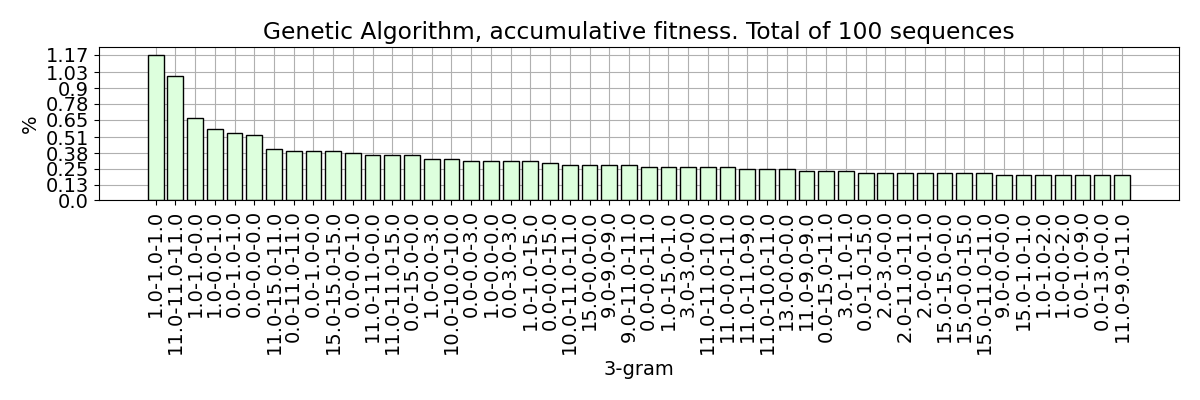

Total n-grams: 4914, Shown: 1237


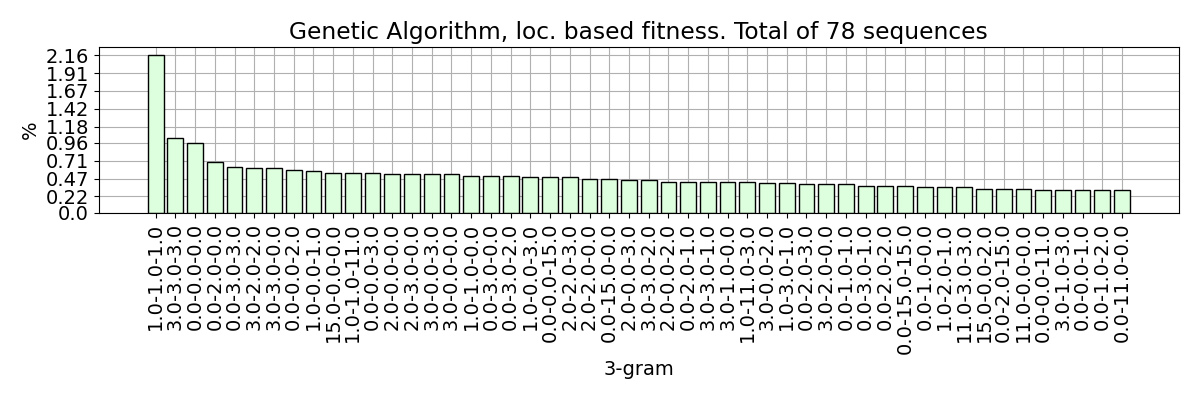

Total n-grams: 148113, Shown: 79992


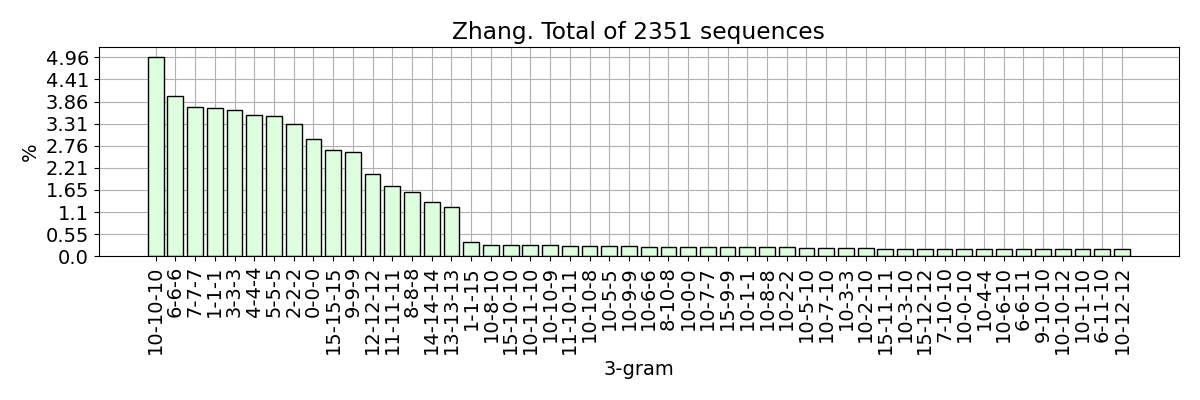

Total n-grams: 124907, Shown: 67177


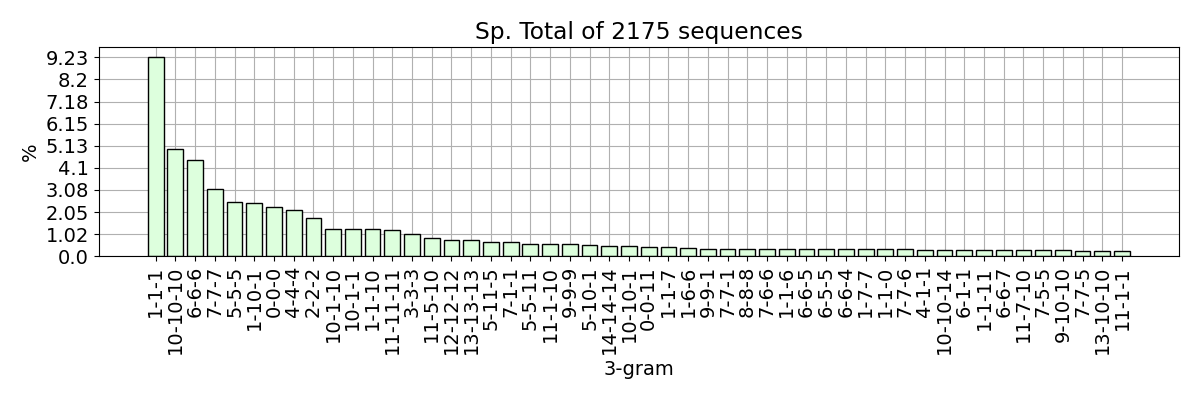

In [5]:
for array, title in zip(action_arrays, titles):
    ngram(array, title, n=3)
